Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       370
           1       0.29      0.14      0.19        71

    accuracy                           0.81       441
   macro avg       0.57      0.54      0.54       441
weighted avg       0.76      0.81      0.78       441

Predictions saved to 'attrition_predictions.csv'.

Confusion Matrix:
 [[346  24]
 [ 61  10]]


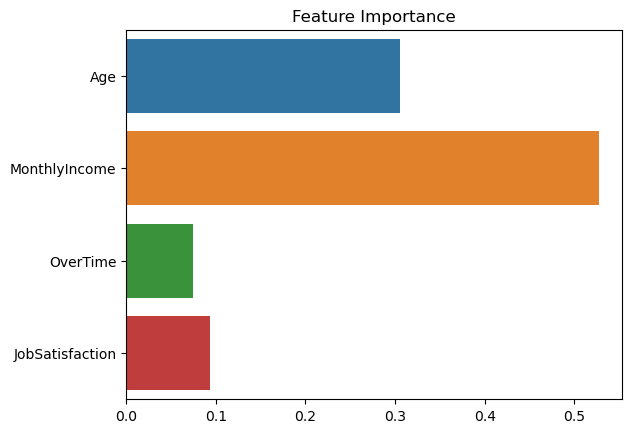

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("employee_attrition.csv")

# Step 1: Data Preprocessing
imputer = SimpleImputer(strategy='mean')
data[['Age', 'MonthlyIncome', 'JobSatisfaction']] = imputer.fit_transform(
    data[['Age', 'MonthlyIncome', 'JobSatisfaction']]
)

# Encode categorical variables
data['OverTime'] = data['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Step 2: Feature Selection
X = data[['Age', 'MonthlyIncome', 'OverTime', 'JobSatisfaction']]
y = data['Attrition']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Step 4: Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Step 5: Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 6: Save Predictions to CSV
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.to_csv('attrition_predictions.csv', index=False)

print("Predictions saved to 'attrition_predictions.csv'.")

# Step 7: Display Confusion Matrix and Feature Importances
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance")
plt.show()
